In [2]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import kneighbors_graph
from sklearn.manifold import TSNE

In [5]:
dados_tratados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv')
pd.set_option('display.max_columns', None)

In [6]:
troca = {'Sim' : 1,
         'Nao' : 0}

dados_tratados = dados_tratados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'SegurancaOnline', 'BackupOnline', 'SeguroNoDispositivo', 'SuporteTecnico', 'TVaCabo', 'StreamingDeFilmes', 'PagamentoOnline', 'Churn']].replace(troca)
pd.set_option('display.max_rows', None)
dados_tratados
valor_a_remover = 'SemServicoDeInternet'
dados_tratados.replace(valor_a_remover, float(0), inplace=True)

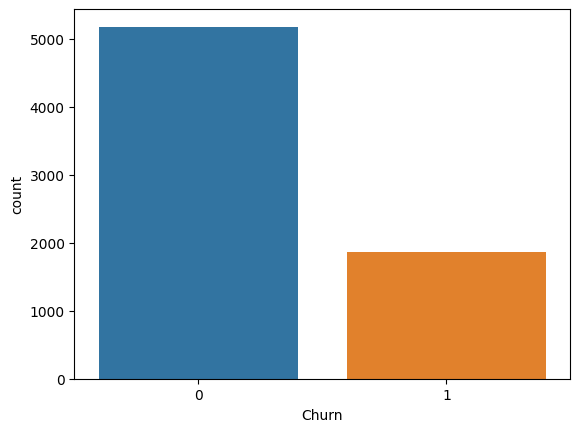

In [7]:
# Suponha que você tenha seus dados em 'dados_tratados'
ax = sns.countplot(x='Churn', data=dados_tratados)

# Configure a exibição do gráfico
plt.show()

In [8]:
X = dados_tratados.drop('Churn', axis = 1)
y = dados_tratados['Churn']

In [9]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [10]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,PagamentoOnline,Churn
0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
1,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0,0


In [56]:
dados_final.to_csv('dados_final.csv')

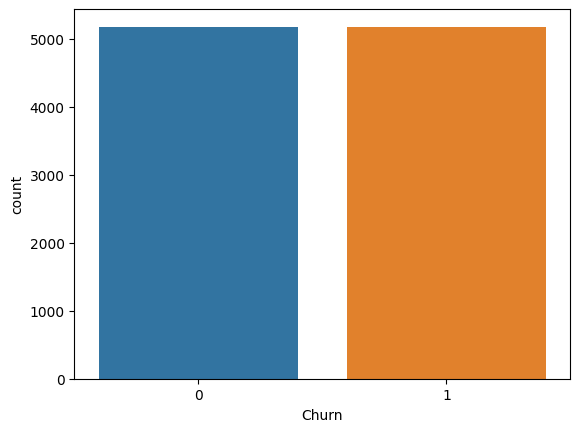

In [11]:
# Suponha que você tenha seus dados em 'dados_tratados'
ax = sns.countplot(x='Churn', data=dados_final)

# Configure a exibição do gráfico
plt.show()

In [12]:
#Tentando prever se a maria vai dar 'churn' ou não

Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]
#Ymaria = ??

In [20]:
X_normalizado = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [21]:
normalizador = StandardScaler()
normalizador.fit_transform(X_normalizado)

array([[ 1.12266456, -0.58776588, -3.09878347, ..., -0.81334544,
        -0.82740359,  0.75625901],
       [-0.89073802, -0.58776588,  0.32270728, ..., -0.81334544,
        -0.82740359, -1.32229829],
       [-0.89073802, -0.58776588,  0.32270728, ..., -0.81334544,
        -0.82740359,  0.75625901],
       ...,
       [ 1.12266456,  1.70135769,  0.32270728, ..., -0.81334544,
        -0.82740359,  0.75625901],
       [-0.89073802, -0.58776588,  0.32270728, ..., -0.81334544,
        -0.82740359, -1.32229829],
       [-0.89073802, -0.58776588,  0.32270728, ..., -0.81334544,
        -0.82740359, -1.32229829]])

In [24]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size = 0.3, random_state= 123)

In [28]:
knn = KNeighborsClassifier(metric = 'euclidean')
knn.fit(X_treino,y_treino)

KNeighborsClassifier(metric='euclidean')

In [29]:
predito_knn = knn.predict(X_teste)
predito_knn

array([1, 0, 0, ..., 1, 1, 1])

In [37]:
knn.score(X_teste, y_teste)*100

65.31400966183575

In [43]:
A = knn.kneighbors_graph(X_teste)

<3105x7243 sparse matrix of type '<class 'numpy.float64'>'
	with 15525 stored elements in Compressed Sparse Row format>

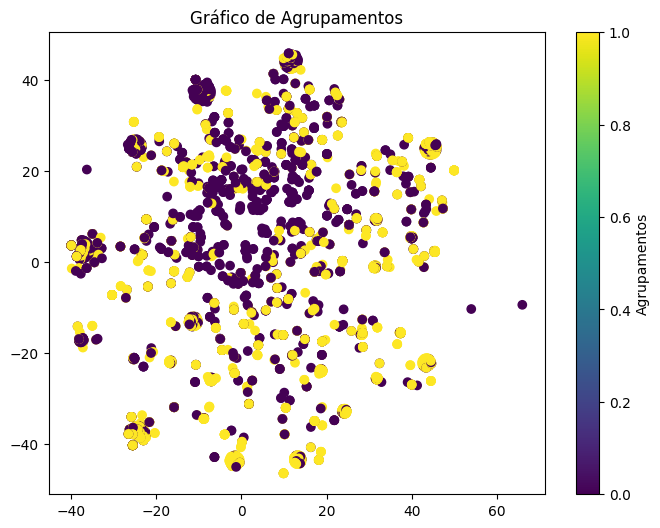

In [46]:
# Reduza a dimensionalidade dos dados usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_teste)

# Plote os pontos com cores representando os agrupamentos
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_teste, cmap='viridis')
plt.colorbar(label='Agrupamentos')
plt.title('Gráfico de Agrupamentos')
plt.show()

In [47]:
X_embedded

array([[-16.551796 , -21.6382   ],
       [  6.954354 ,   1.1380324],
       [ 12.315053 ,  27.32497  ],
       ...,
       [ 45.511234 ,   2.1824524],
       [-25.535398 , -40.23305  ],
       [ 24.753975 , -32.879032 ]], dtype=float32)

In [49]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [50]:
#criamos o modelo
bnb = BernoulliNB(binarize=-0.44)#binarize é um parâmetro que serve para o modelo entender quais valores transformar para binário

In [51]:
#escolho utilizar mediana, porque é o valor central dos nossos dados ordenados
np.median(X_treino)

0.0

In [55]:
np.median(X)

0.0